<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [6]</a>'.</span>

# Sea Surface Height

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
from mom6_tools.m6plot import myStats, annotateStats, xycompare
import cartopy.crs as ccrs
import cartopy.feature
import intake
%matplotlib inline

In [3]:
# load aviso from oce-catalog
obs = 'adt-aviso-tx2_3v2'
catalog = intake.open_catalog(diag_config_yml['oce_cat'])
print('\n Reading climatology from: ', obs)
ssh_obs = catalog[obs].to_dask().where(grd_xr[0].wet > 0.)
ssh_obs


 Reading climatology from:  adt-aviso-tx2_3v2


<xarray.Dataset> Size: 6MB
Dimensions:  (yh: 480, xh: 540)
Coordinates:
    geolat   (yh, xh) float64 2MB dask.array<chunksize=(480, 540), meta=np.ndarray>
    geolon   (yh, xh) float64 2MB dask.array<chunksize=(480, 540), meta=np.ndarray>
  * xh       (xh) float64 4kB -286.7 -286.0 -285.3 -284.7 ... 71.33 72.0 72.67
  * yh       (yh) float64 4kB -81.56 -81.46 -81.36 -81.26 ... 87.65 87.71 87.74
Data variables:
    adt      (yh, xh) float64 2MB dask.array<chunksize=(480, 540), meta=np.ndarray>

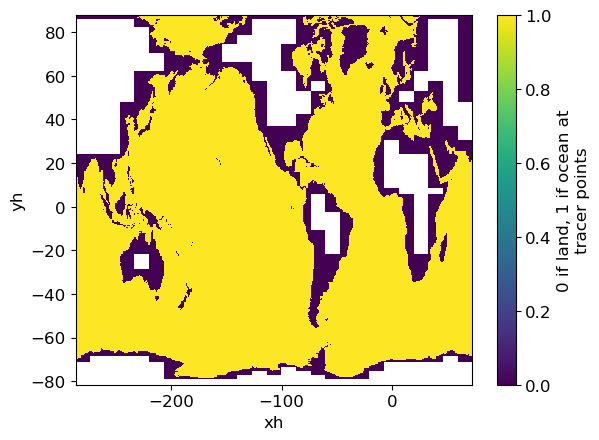

In [4]:
grd_xr[i].wet.plot()

## Mean SSH

In [5]:
ds = []
for path, case, i in zip(ocn_path, casename, range(len(label))):
  ds.append(xr.open_dataset(path+case+'_SSH.nc'))

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [6]:
obs.shape

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
correct = ssh_obs.adt.weighted(grd_xr[0].areacello.fillna(0)).mean(("xh", "yh")).values
obs   = np.ma.masked_where(grd_xr[0].wet.fillna(0) == 0, ssh_obs.adt.fillna(0).values) - correct

for i in range(len(label)):
    model = np.ma.masked_invalid(ds[i].mean_ssh.values)
    
    xycompare(model, 
            obs, 
            grd[i].geolon, grd[i].geolat, grd[0].areacello,
            title1 = label[i], 
            title2 = 'adt (AVISO)', 
            suptitle=' Mean Sea Level, '+ str(start_date) + ' to ' + str(end_date),
            colormap=plt.cm.RdBu_r, dcolormap=plt.cm.bwr,
            clim = (-1.5,1.5), extend='both')
      
fig, ax = plt.subplots(figsize=(8,10))
for i in range(len(label)):
    ds[i].mean_ssh.weighted(grd_xr[i].areacello.fillna(0)).mean('xh').plot(y="yh", ax=ax, label=label[i])
    
(ssh_obs.adt.fillna(0) - correct).weighted(grd_xr[0].areacello.fillna(0)).mean('xh').plot(y="yh", ax=ax, label='obs (deBoyer)')
ax.set_title('Zonally averaged SSH')
ax.set_xlabel('SSH [m]')
ax.grid()
ax.legend();

## Monthly SSH climatology

In [ ]:
for i in range(len(casename)):
  ds_model = ds[i].assign_coords({
    "latitude": (("yh", "xh"), grd[i].geolat.data),
    "longitude": (("yh", "xh"), grd[i].geolon.data)
  })  
  g = ds_model.ssh_climatology.plot(x="longitude", y="latitude", col='month', 
                col_wrap=3,
                robust=True,
                figsize=(14,12),
                cmap=plt.cm.RdBu_r,
                vmin=-1.2, vmax=1.2,
                cbar_kwargs={"orientation": "horizontal", "pad": 0.05, "label": 'MLD (m), 0.03 density criteria'},
               )
  # Add a suptitle
  g.fig.suptitle('Run {}, mean between {} to {}'.format(label[i], start_date, end_date), fontsize=16, y=1.02);

In [ ]:
for i in range(len(casename)):
  ds_model = ds[i].assign_coords({
    "latitude": (("yh", "xh"), grd[i].geolat.data),
    "longitude": (("yh", "xh"), grd[i].geolon.data)
  })  
  ax = ds_model.ssh_climatology.weighted(grd_xr[i].areacello.fillna(0)).mean('xh').plot(hue='month',
                                        figsize=(10,6)
                                        )                                                                            
  plt.grid()
  plt.suptitle('Run {}, mean between {} to {}'.format(label[i], start_date, end_date), fontsize=16, y=1.02);